In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
dfOS = pd.read_csv("../00_InputData/os_sensitive_OS.tsv",sep='\t')
dfOS.head()

,Entry,Gene_Name,Intensity 3old-0-R1,Intensity 3old-0-R2,Intensity 3old-0-R3,Intensity 3old-5-R1,Intensity 3old-5-R2,Intensity 3old-5-R3,Intensity 3old-20-R1,Intensity 3old-20-R2,...,Intensity 4old-0-R3,Intensity 4old-5-R1,Intensity 4old-5-R2,Intensity 4old-5-R3,Intensity 4old-20-R1,Intensity 4old-20-R2,Intensity 4old-20-R3,A5 - A0,A20 - A0,A20 - A5
0,optoSrc,NaN,24.845187,25.063744,24.719514,26.874403,26.858979,27.055007,27.731313,27.831856,...,24.505757,26.373647,26.226303,26.192030,26.917674,26.949752,27.156484,1,1,1
1,E2RFE1,NaN,23.159601,22.823696,22.706777,22.871346,22.776962,23.036993,23.131036,23.317296,...,23.805019,23.303657,23.191523,23.392577,23.206277,23.092375,22.943882,0,-1,0
2,J9P969,AHNAK,24.716251,24.782220,24.769965,25.055978,25.501265,25.603115,24.898200,24.737145,...,24.597106,25.481823,25.383310,25.414064,24.039937,24.656397,24.726940,0,0,-1
3,E2QXI3,AIMP1,22.490673,22.641305,22.263827,22.986857,23.186464,23.344409,23.387277,23.008314,...,22.444628,22.642645,22.654104,22.869157,23.238302,23.366169,23.479129,0,1,1
4,E2QVF9,AIMP2,21.962793,21.985355,21.710670,22.080910,22.135462,22.567953,22.683457,22.703199,...,21.644176,22.482424,22.315144,21.867828,22.545465,22.554504,22.949274,0,1,0


In [118]:
dfCIBN = pd.read_csv("../00_InputData/os_sensitive_CIBN.tsv",sep='\t')
dfCIBN.head()

,Entry,Gene_Name,Intensity 3old-0-R1,Intensity 3old-0-R2,Intensity 3old-0-R3,Intensity 3old-5-R1,Intensity 3old-5-R2,Intensity 3old-5-R3,Intensity 3old-20-R1,Intensity 3old-20-R2,...,Intensity 4old-0-R3,Intensity 4old-5-R1,Intensity 4old-5-R2,Intensity 4old-5-R3,Intensity 4old-20-R1,Intensity 4old-20-R2,Intensity 4old-20-R3,B5 - B0,B20 - B0,B20 - B5
0,optoSrc,NaN,24.845187,25.063744,24.719514,26.874403,26.858979,27.055007,27.731313,27.831856,...,24.505757,26.373647,26.226303,26.192030,26.917674,26.949752,27.156484,1,1,1
1,E2QXI3,AIMP1,22.490673,22.641305,22.263827,22.986857,23.186464,23.344409,23.387277,23.008314,...,22.444628,22.642645,22.654104,22.869157,23.238302,23.366169,23.479129,1,1,0
2,E2R9A2,COPB1,20.583876,19.580197,19.912300,19.515347,20.446335,19.998641,18.774315,18.578999,...,19.359797,19.708729,19.932811,20.536436,19.576637,19.351312,19.543541,0,-1,-1
3,E2QUR2,EPRS,25.702282,26.085744,25.738771,26.148723,25.995953,26.155798,26.700727,26.788817,...,25.254011,25.912125,25.915650,25.949909,26.433437,26.427155,26.441976,0,1,1
4,E2RH59,GNPDA2,20.555486,19.808402,20.541722,19.751269,20.244514,20.072681,19.071381,19.009996,...,21.094140,20.228424,19.659203,19.460986,20.336835,20.918740,19.552109,0,-1,0


In [119]:
def comp_beta_sum(t1,t0,m):
    s = (2**t1 - 2**t0)[m]
    s = np.abs(s)
    S = np.sum(s)
    s = s/np.sum(s)
    return s,S

## Beta in CIBN

In [165]:
t0 = np.mean(dfCIBN.iloc[:,2:5],axis= 1)
t5 = np.mean(dfCIBN.iloc[:,5:8],axis= 1)
t20 = np.mean(dfCIBN.iloc[:,8:11],axis= 1)

### T20 - T0

In [166]:
s1,S1 = comp_beta_sum(t20,t0,dfCIBN.iloc[:,-2] != 0)
s1[0],S1

(0.5145388510469338, 381868977.6930736)

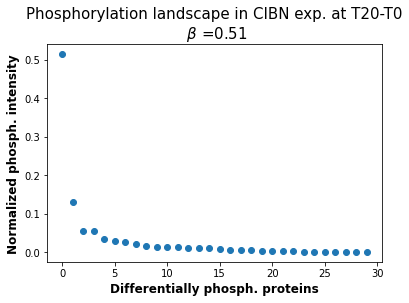

In [167]:
plt.scatter(range(len(s1)),sorted(s1,reverse=True))
plt.title(f'Phosphorylation landscape in CIBN exp. at T20-T0\n'+r' $\beta$'+f' ={s1[0]:.2f}', fontsize = 15)
plt.xlabel('Differentially phosph. proteins',weight='bold', fontsize = 12)
plt.ylabel('Normalized phosph. intensity', fontsize = 12,weight='bold')
plt.savefig('../05_Output/estimate_beta/betaCIBN20.png', dpi=600)

### T5 - T0

In [168]:
s2,S2 = comp_beta_sum(t5,t0,dfCIBN.iloc[:,-3] != 0)
s2[0],S2

(0.6060229122046742, 160091773.91149706)

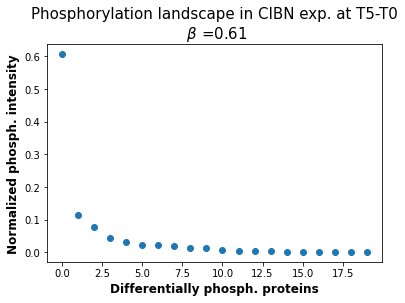

In [169]:
plt.scatter(range(len(s2)),sorted(s2,reverse=True))
plt.title(f'Phosphorylation landscape in CIBN exp. at T5-T0\n'+r' $\beta$'+f' ={s2[0]:.2f}', fontsize = 15)
plt.xlabel('Differentially phosph. proteins',weight='bold', fontsize = 12)
plt.ylabel('Normalized phosph. intensity', fontsize = 12,weight='bold')
plt.savefig('../05_Output/estimate_beta/betaCIBN5.png',dpi=600)

In [170]:
S1/S2

2.38531292622306

## Beta in OS

In [171]:
t0 = np.mean(dfOS.iloc[:,11:14],axis= 1)
t5 = np.mean(dfOS.iloc[:,14:17],axis= 1)
t20 = np.mean(dfOS.iloc[:,17:20],axis= 1)

### T20 - T0

In [172]:
s1,S1 = comp_beta_sum(t20,t0,dfOS.iloc[:,-2] != 0)
s1[0],S1

(0.4112596261422355, 270266237.1683042)

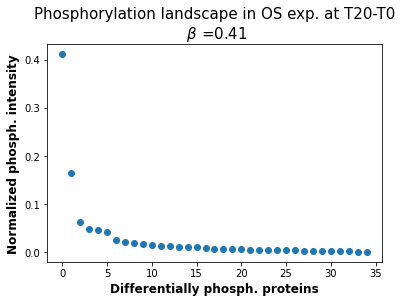

In [173]:
plt.scatter(range(len(s1)),sorted(s1,reverse=True))
plt.title(f'Phosphorylation landscape in OS exp. at T20-T0\n'+r' $\beta$'+f' ={s1[0]:.2f}', fontsize = 15)
plt.xlabel('Differentially phosph. proteins',weight='bold', fontsize = 12)
plt.ylabel('Normalized phosph. intensity', fontsize = 12,weight='bold')
plt.savefig('../05_Output/estimate_beta/betaOS20.png',dpi=600)

### T5 - T0

In [161]:
s2,S2 = comp_beta_sum(t5,t0,dfOS.iloc[:,-3] != 0)
s2[0],S2

(0.8167852043446315, 69507282.5108868)

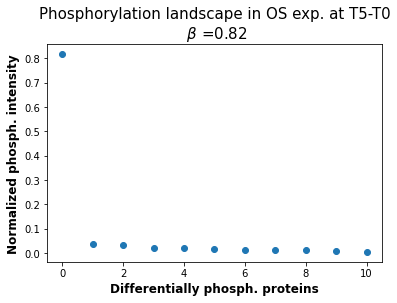

In [164]:
plt.scatter(range(len(s2)),sorted(s2,reverse=True))
plt.title(f'Phosphorylation landscape in OS exp. at T5-T0\n'+r' $\beta$'+f' ={s2[0]:.2f}', fontsize = 15)
plt.xlabel('Differentially phosph. proteins',weight='bold', fontsize = 12)
plt.ylabel('Normalized phosph. intensity', fontsize = 12,weight='bold')
plt.savefig('../05_Output/estimate_beta/betaOS5.png',dpi=600)

In [53]:
S1/S2

1.870218750166236